# Deep Learning Assignment 2: Reinforcement Learning

Tutorials referenced and used during creation of this notebook file

https://tiewkh.github.io/blog/deepqlearning-openaitaxi/



https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

Imports

In [1]:
import numpy as np
import random
import gym

from tensorflow.keras.layers import Dense, Flatten, Reshape, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam

from rl.agents.dqn import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import EpsGreedyQPolicy,LinearAnnealedPolicy
from rl.core import Processor

Creating the agent

In [2]:
def create_agent(states, actions):
    model = Sequential()
    
    model.add(Embedding(states, 10, input_length=1))
    model.add(Reshape((10,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(action_size, activation='linear'))
    
    return model

Create the environment & DQNAgent

Chosen environment is Taxi-v3

In [4]:
env = gym.make('Taxi-v3')
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [5]:
np.random.seed(123)
env.seed(123)

[123]

In [6]:
env.reset()
env.step(env.action_space.sample())[0]

351

In [7]:
state_size = env.observation_space.n
action_size = env.action_space.n
print("No of state = ", state_size)
print("No of actions =", action_size)
model = create_agent(state_size,action_size)
model.summary()

No of state =  500
No of actions = 6
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             5000      
_________________________________________________________________
reshape (Reshape)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                550       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 306       
Tota

loading the policy and agent

In [8]:
memory = SequentialMemory(limit=80000, window_length=1)

#policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),attr='eps',
                             #value_max=1.,value_min=.1,
                             #value_test=.05,nb_steps=10000)
        
policy = EpsGreedyQPolicy()
 

single_dqn = DQNAgent(model=model,nb_actions=action_size,
              memory=memory,nb_steps_warmup=500,
              policy=policy,enable_double_dqn=False,target_model_update=1e-2)

single_dqn.compile(Adam(lr=1e-3),metrics=['mae'])

Train

In [9]:
hist_single = single_dqn.fit(env, nb_steps=300000, 
                             visualize=False, verbose=1, 
                             nb_max_episode_steps=99)

Training for 300000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 71s 7ms/step - reward: -1.6930
101 episodes - episode_reward: -167.614 [-936.000, -99.000] - loss: 1.812 - mae: 17.189 - mean_q: -16.877 - prob: 1.000

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 71s 7ms/step - reward: -1.3231
101 episodes - episode_reward: -130.901 [-504.000, -99.000] - loss: 3.029 - mae: 23.473 - mean_q: -24.097 - prob: 1.000

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 73s 7ms/step - reward: -1.4146
101 episodes - episode_reward: -139.802 [-864.000, -98.000] - loss: 4.582 - mae: 28.459 - mean_q: -30.045 - prob: 1.000

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 74s 7ms/step - reward: -1.3393
101 episodes - episode_reward: -132.772 [-549.000, -99.000] - loss: 4.312 - mae: 27.220 - mean_q: -28.591 - prob: 1.000

Interval 5 (40000 steps performed)
100

Test the DQN agent

In [10]:
#env.reset()
res_single = single_dqn.test(env, nb_episodes=5, visualize=True,nb_max_episode_steps=99)

Testing for 5 episodes ...
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | :_:G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: |_: :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : |_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |

In [11]:
res_single.history

{'episode_reward': [6.0, 6.0, 9.0, 9.0, 6.0], 'nb_steps': [15, 15, 12, 12, 15]}

In [12]:
print(np.average(res_single.history['episode_reward']))

7.2


# Run the same process for the Double DQN agent

In [13]:
double_dqn = DQNAgent(model=model,nb_actions=action_size,
              memory=memory,nb_steps_warmup=500,
              policy=policy,enable_double_dqn=True,target_model_update=1e-2)

In [14]:
double_dqn.compile(Adam(lr=1e-3),metrics=['mae'])
hist_double = double_dqn.fit(env, nb_steps=300000, 
                             visualize=False, verbose=1, 
                             nb_max_episode_steps=99)

Training for 300000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 88s 9ms/step - reward: 0.1865
670 episodes - episode_reward: 2.804 [-49.000, 15.000] - loss: 0.002 - mae: 7.360 - mean_q: 12.697 - prob: 1.000

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 91s 9ms/step - reward: 0.1613
682 episodes - episode_reward: 2.355 [-56.000, 15.000] - loss: 0.002 - mae: 7.344 - mean_q: 12.668 - prob: 1.000

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 91s 9ms/step - reward: 0.1526
674 episodes - episode_reward: 2.274 [-43.000, 15.000] - loss: 0.002 - mae: 7.343 - mean_q: 12.668 - prob: 1.000

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 93s 9ms/step - reward: 0.1157
677 episodes - episode_reward: 1.728 [-86.000, 15.000] - loss: 0.002 - mae: 7.358 - mean_q: 12.695 - prob: 1.000

Interval 5 (40000 steps performed)
10000/10000 [======================

In [15]:
#env.reset()
res_double = double_dqn.test(env, nb_episodes=5, visualize=True,nb_max_episode_steps=99)

Testing for 5 episodes ...
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |


In [16]:
res_double.history

{'episode_reward': [7.0, 8.0, 4.0, 8.0, 11.0],
 'nb_steps': [14, 13, 17, 13, 10]}

In [17]:
print(np.average(res_double.history['episode_reward']))

7.6


save weights and history and results

In [19]:
import os
import pandas as pd

my_path = os.getcwd()
print(my_path)

C:\Uni Work\Final Year\Deep Learning\Assignment 2


In [20]:
single_dqn.save_weights('single_dqn.h5f'.format('Taxi-v3'),overwrite=True)
hist_single_df = pd.DataFrame(hist_single.history)
hist_single_csv_file = my_path+'hist_single.csv'
with open(hist_single_csv_file, mode='w') as f:
    hist_single_df.to_csv(f)
# also save the history as a dictionary for plotting
dict_single_file = my_path+'dict_single.npy'
np.save(dict_single_file,hist_single.history)

In [21]:
double_dqn.save_weights('double_dqn.h5f'.format('Taxi-v3'),overwrite=True)
hist_double_df = pd.DataFrame(hist_double.history)
hist_double_csv_file = my_path+'hist_double.csv'
with open(hist_double_csv_file, mode='w') as f:
    hist_double_df.to_csv(f)
# also save the history as a dictionary for plotting
dict_double_file = my_path+'dict_double.npy'
np.save(dict_double_file,hist_double.history)

load the information from file

# Plot performance

In [18]:
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
# Make graph stand out so it can be read even when using a dark theme
plt.rcParams.update({
    "figure.facecolor": "white"
})

In [40]:
#single_y = np.array(res_single.history['episode_reward'])
#double_y = np.array(res_double.history['episode_reward'])
print(hist_single.history['nb_steps'])

[99, 198, 297, 396, 495, 594, 693, 792, 891, 990, 1089, 1188, 1287, 1386, 1485, 1584, 1683, 1782, 1881, 1980, 2079, 2178, 2277, 2376, 2475, 2574, 2673, 2772, 2871, 2970, 3069, 3168, 3267, 3366, 3465, 3564, 3663, 3762, 3861, 3960, 4059, 4158, 4257, 4356, 4455, 4554, 4653, 4752, 4851, 4950, 5049, 5148, 5247, 5346, 5445, 5544, 5643, 5742, 5841, 5940, 6039, 6138, 6237, 6336, 6435, 6534, 6633, 6732, 6831, 6930, 7029, 7128, 7227, 7326, 7425, 7524, 7623, 7722, 7821, 7920, 8019, 8118, 8217, 8316, 8415, 8514, 8613, 8712, 8811, 8910, 9009, 9108, 9207, 9306, 9405, 9504, 9603, 9702, 9801, 9900, 9999, 10098, 10197, 10296, 10395, 10494, 10593, 10692, 10791, 10890, 10989, 11088, 11187, 11286, 11385, 11484, 11583, 11682, 11781, 11880, 11979, 12078, 12177, 12276, 12375, 12474, 12573, 12672, 12771, 12870, 12969, 13068, 13167, 13266, 13365, 13464, 13563, 13662, 13761, 13860, 13959, 14058, 14157, 14256, 14355, 14454, 14553, 14652, 14751, 14850, 14949, 15048, 15147, 15246, 15345, 15444, 15543, 15642, 15741

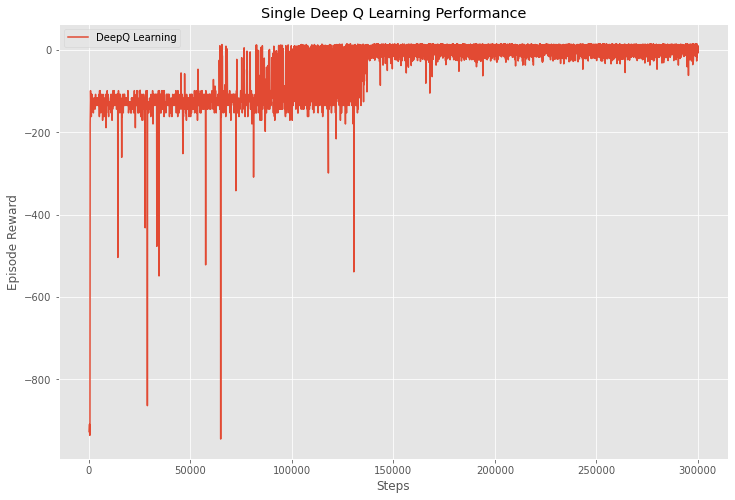

In [51]:
fig = plt.figure(figsize=(12,8))
plt.title("Single Deep Q Learning Performance")
plt.plot(hist_single.history['nb_steps'],
         hist_single.history['episode_reward'], label="DeepQ Learning",)
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Episode Reward")
plt.show()
fig.savefig('single_dqn_performance.png')

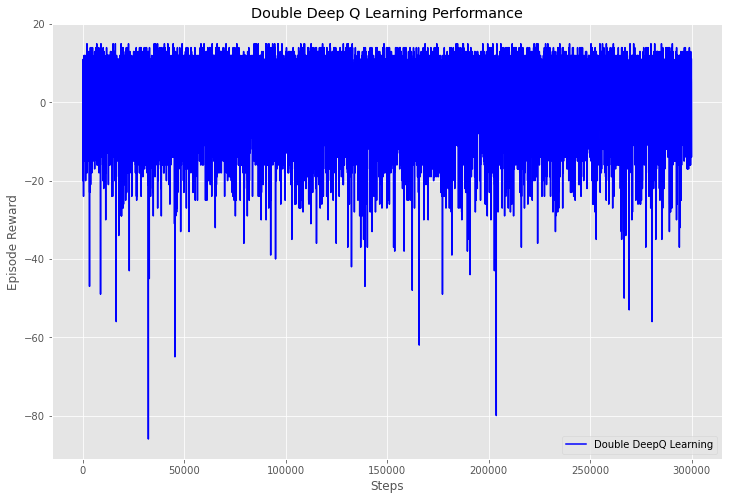

In [52]:
fig = plt.figure(figsize=(12,8))
plt.title("Double Deep Q Learning Performance")
plt.plot(hist_double.history['nb_steps'],
         hist_double.history['episode_reward'],'b', label="Double DeepQ Learning")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Episode Reward")
plt.show()
fig.savefig('double_dqn_performance.png')